<div align="right">
  <img src="https://drive.google.com/uc?export=view&id=1J8JpP65HsHXdpJvhb_sMwn3yROyU832m" height="80" width="200" style="float: right;">
</div>
<h1><b>Data Science and Machine Learning</b></h1>
<h2><b>Clase 14</b>: Análisis Exploratorio de Datos (parte 1)</h2>
<h3><b>Docente</b>: <a href="https://www.linkedin.com/in/danielablanco/">Daniela Blanco</a>

# Contenido

- [1. Etapas en Machine Learning](#etapas)
- [2. Análisis Exploratorio de Datos](#eda)
- [3. Conociendo el dataset](#info)
- [4. Eliminación de duplicados](#duplicados)
- [5. Selección de atributos relevantes](#atributos)
- [6. Análisis univariante](#univariante)
- [7. Análisis multivariante](#multivariante)
- [8. Links de interés](#links)


In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

## 1. Etapas en Machine Learning <a name="etapas"></a>

<img src="https://drive.google.com/uc?export=view&id=1syOzOeMPk3NN-X6xy7LaS-6XpSBtRFl1" height="143" width="994" style="float: center;">

El flujo ideal de Machine Learning debe contener las siguientes fases:

**1. Definición del problema**: Se identifica una necesidad que se trata de solucionar utilizando Machine Learning.

**2. Obtención de datos**: Identificar y acceder a las fuentes de datos relevantes.Recopilar los datos necesarios para el proyecto. Organizar y almacenar los datos de manera adecuada.

**3. Preparación de datos**: se deben conocer los datos con los que se trabajará y prepararlos para ser consumidos por los modelos. Esta etapa es una de la que mayor porcentaje de tiempo del proyecto consumirá. Incluye diversas tareas:
  - análisis descriptivo (medídas estadísticas, distribuciones, etc.),
  - análisis exploratorio (EDA, univariado, multivariado),
  - limpieza de datos (valores faltantes, duplicados, valores atípicos, inconsistencias),
  - transformaciones de datos (escalado, codificar ciertas carácterísticas),
  - selección de características (ver relevantes),
  - división de datos para entrenamiento y prueba.

**4. Modelado**: se eligen diversos algoritmos para experimentar y sus hiperparámetros. Entrenamiento y evaluación de modelos.

**5. Optimización de hiperparámetros**: Ajustar los hiperparámetros para mejorar el rendimiento. Evaluación de nuevos modelos.

**6. Evaluación de modelos**: elección del mejor modelo.

**7. Despliegue**: implementación del modelo en un entorno productivo.


## 2. Análisis Exploratorio de Datos <a name="eda"></a>

El análisis exploratorio de datos (EDA, Exploratory data analysis) es el enfoque de partida y fundamental de cualquier análisis de datos.

Tiene como objetivo comprender las características principales de un conjunto de datos antes de realizar análisis más avanzados o modelados posteriores.

<img src="https://drive.google.com/uc?export=view&id=1xfDWJV3DpTFf8ZeM_Cwa-zF3ePqmTdhg" height="329" width="593" style="float: center;">

El EDA incluye:

- Análisis descriptivo: se centra en describir las características principales de un conjunto de datos mediante estadísticas descriptivas, como la media, la mediana, el rango, etcétera. Su objetivo principal es proporcionar una descripción clara y resumida de los datos.

- Visualización de datos: Usando gráficos como histogramas, box plots, scatter plots y muchos otros para visualizar la distribución de los datos, las relaciones entre las variables y cualquier anomalía o particularidad en los datos.

- Identificación de anomalías: detectando y, a veces, tratando valores atípicos o datos faltantes que podrían afectar posteriores análisis.

- Formulación de hipótesis: A partir de la exploración, los analistas pueden comenzar a formular hipótesis que luego se testearán en un análisis más detallado o en el modelado.

## 3. Conociendo el dataset <a name="info"></a>

Vamos a trabajar con el dataset de [titanic](https://www.kaggle.com/competitions/titanic/data)

| Variable |                 Definition                 |                       Key                      |
|:--------:|:------------------------------------------:|:----------------------------------------------:|
| survival | Supervivencia                                   | 0 = No, 1 = Yes                                |
| pclass   | Clase del boleto                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sexo                                        |                                                |
| Age      | Edad en años                               |                                                |
| sibsp    | Número de hermanos/cónyuges a bordo del Titanic |                                                |
| parch    | Número de padres/hijos a bordo del Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Tarifa                             |                                                |
| cabin    | Cabina number                               |                                                |
| embarked | Puerto de embarque                        | C = Cherbourg, Q = Queenstown, S = Southampton |

En este caso, queremos analizar qué personas sobrevivieron o no en el naufragio del Titanic.

In [2]:
# conexion drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
archivo = '/content/drive/MyDrive/4Geeks/cursadas/ds_pt_8/data/titanic_kaggle.csv'

df = pd.read_csv(archivo)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Conocer las dimensiones y tipologías de datos del objeto con el que estamos trabajando es vital

In [5]:
# Obtener las dimensiones
df.shape

(1309, 12)

In [6]:
# Obtener información sobre tipos de datos y valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


- Existen un total de 1309 filas (en este caso, personas) y 12 columnas, de entre las que encontramos el objetivo o clase a predecir, `Survived`.

- La variable `Cabin` solo tiene 295 instancias con valores, por lo que contendría más de 1000 valores nulos.

- La variable `Age` también cuenta con valores nulos, pero en un número mucho más reducido que el anterior.

- El resto de variables cuentan siempre todos los valores.

- Los datos cuentan con 7 características numéricas y 5 características categóricas.

## 4. Eliminación de duplicados <a name="duplicados"></a>

La evaluación de valores duplicados es una parte esencial del Análisis Exploratorio de Datos.

Esta evaluación implica identificar y manejar registros duplicados en los datos.

Los valores duplicados pueden sesgar el análisis y afectar negativamente el rendimiento del modelo de ML.

**¿Qué es un valor duplicado?**

Un valor duplicado en un DataFrame es un registro (fila) que tiene exactamente los mismos valores en todas las columnas que otro registro.

Pero dependiendo del caso de uso podemos considerar un duplicado cuando coincide en solo una selección de atributos.

En algunos casos, ciertos duplicados pueden ser importantes. Debemos decidir cuáles mantener basándose en reglas específicas del negocio o el contexto del problema.

**¿Por qué es importante manejar los duplicados?**

- Redundancia: Los duplicados no aportan información nueva y pueden hacer que los algoritmos de ML aprendan patrones redundantes.

- Sesgo: Los duplicados pueden sesgar los resultados del modelo, haciendo que ciertas observaciones tengan más peso que otras.

- Costo computacional: Incrementan el tamaño del conjunto de datos innecesariamente, aumentando el costo de almacenamiento y procesamiento.

**Pandas**

- Usamos el método duplicated() para detectar duplicados en un DataFrame y
 sum() para contar el número de duplicados.

```
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
```
- Para seleccionar duplicados:

```
df_duplicados = df[duplicados]
```

- Usar el método drop_duplicates() para eliminar filas duplicadas. Se puede indicar el conjunto de atributos a considerar.

```
df_sin_duplicados = df.drop_duplicates()
```

En el ejemplo Titanic:

Tenemos que tener en cuenta que una instancia puede estar repetida independientemente del identificador que pueda tener, así que en este caso nos interesa eliminar del análisis la variable `PassengerId`, ya que podría estar mal generada.

In [7]:
# control de duplicados
df.duplicated().sum()

np.int64(0)

In [8]:
# sin considerar el id
df.drop("PassengerId", axis = 1).duplicated().sum()

np.int64(0)

En este caso, no encontramos ningún valor duplicado. En el caso de que lo hubiésemos encontrado, el siguiente paso sería aplicar la función de `drop_duplicates()`.

## 5. Selección de atributos relevantes <a name="atributos"></a>

Lo que trataremos de hacer es una eliminación controlada de aquellas variables que podemos estar seguros de que el algoritmo no va a utilizar en el proceso predictivo.

En el ejemplo estas son PassengerId, Name, Ticket y Cabin.

- PassengerId, Name y Ticket: por ser algo individual que no va a poder generalizar.

- Cabin por tener un porcentaje alto de nulos.


In [9]:
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1, inplace = True)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## 6. Análisis univariante <a name="univariante"></a>

Esto es, el análisis columna a columna del DataFrame.

Debemos distinguir si una variable es categórica o numérica para utilizar gráficos acordes al tipo.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


#### Análisis sobre variables categóricas

Una **variable categórica** es un tipo de variable que puede tomar uno de un número limitado de categorías. Estos grupos son a menudo nominales (por ejemplo, el color de un coche: rojo, azul, negro, etc, pero ninguno de estos colores es inherentemente "mayor" o "mejor" que los demás) pero pueden también representarse mediante números finitos.

Una forma de representar este tipo de variables es con un gráfico de barras.

En el ejemplo las variables categóricas son `Survived`, `Sex`, `Pclass`, `Embarked`, `SibSp` y `Parch`:

In [11]:
# 0 = No, 1 = Yes
df.Survived.value_counts()

,count
Survived,
0,815
1,494


In [12]:
df.Sex.value_counts()

,count
Sex,
male,843
female,466


In [13]:
# Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
df.Pclass.value_counts()

,count
Pclass,
3,709
1,323
2,277


In [14]:
# Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
df.Embarked.value_counts()

,count
Embarked,
S,914
C,270
Q,123


In [15]:
# of siblings / spouses aboard the Titanic
# Número de hermanos / cónyuges a bordo del Titanic
df.SibSp .value_counts()

,count
SibSp,
0,891
1,319
2,42
4,22
3,20
8,9
5,6


In [16]:
# of parents / children aboard the Titanic
# Número de padres / hijos a bordo del Titanic
df.Parch.value_counts()

,count
Parch,
0,1002
1,170
2,113
3,8
5,6
4,6
6,2
9,2


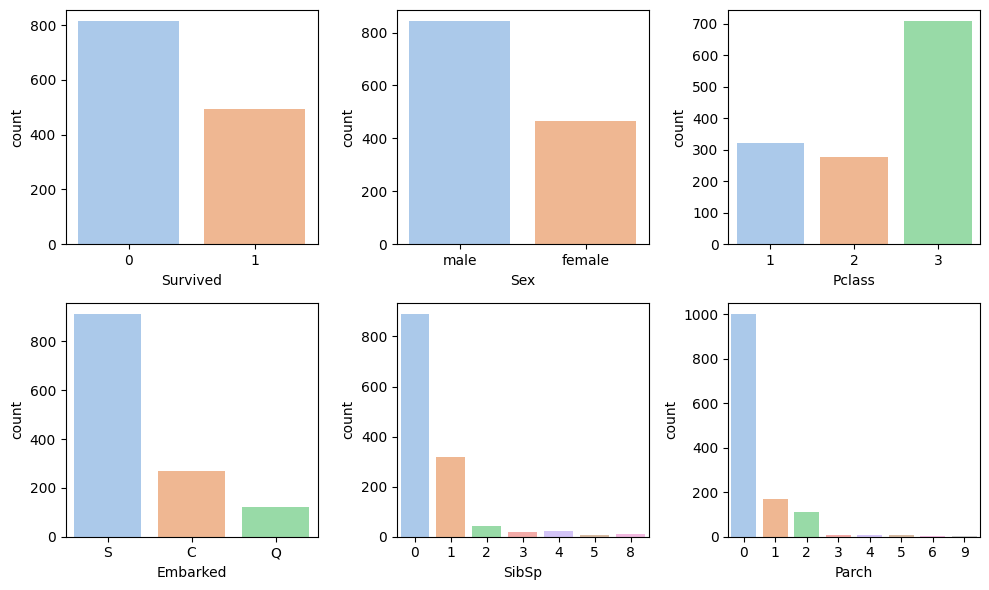

In [17]:
fig, axis = plt.subplots(2, 3, figsize = (10, 6))

sns.countplot(ax = axis[0, 0], data = df, x = "Survived", palette='pastel', hue= "Survived", legend=False)
sns.countplot(ax = axis[0, 1], data = df, x = "Sex", palette='pastel', hue= "Sex", legend=False)
sns.countplot(ax = axis[0, 2], data = df, x = "Pclass", palette='pastel', hue= "Pclass", legend=False)
sns.countplot(ax = axis[1, 0], data = df, x = "Embarked", palette='pastel', hue= "Embarked", legend=False)
sns.countplot(ax = axis[1, 1], data = df, x = "SibSp", palette='pastel', hue= "SibSp", legend=False)
sns.countplot(ax = axis[1, 2], data = df, x = "Parch", palette='pastel', hue= "Parch", legend=False)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Con la representación de cada variable podemos determinar que:

- **Survived**: El número de personas que no sobrevivieron superan en más de 300 a los que sí lo hicieron.
- **Sex**: En el Titanic había casi el doble de hombres que de mujeres.
- **Pclass**: La suma de los pasajeros que viajaban en primera y segunda clase era casi idéntica a las que viajaban en tercera.
- **Embarked**: La mayoría de los pasajeros del Titanic embarcaron en la estación de Southampton (`S`).
- **SibSp**: Más de 800 pasajeros viajaron solos. Los restantes, con su pareja o alguien más de su familia.
- **Parch**: Casi todos los pasajeros viajaron sin padres o hijos. Una pequeña parte sí lo hizo.

#### Análisis sobre variables numéricas

Es un tipo de variable que puede tomar valores numéricos (enteros, fracciones, decimales, negativos, etc.) en un rango infinito.

Una variable categórica numérica puede ser también una variable numérica.

Normalmente se representan utilizando un histograma y diagramas de caja.

Un histograma es una representación gráfica de la distribución de un conjunto de datos. Al observar un histograma, podemos entender si los datos están sesgados hacia un extremo, si son simétricos, si tienen muchos valores atípicos, etcétera.

Se utiliza además para comprender la frecuencia de los datos.  

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


En el ejemplo las numéricas son `Fare` y `Age`.

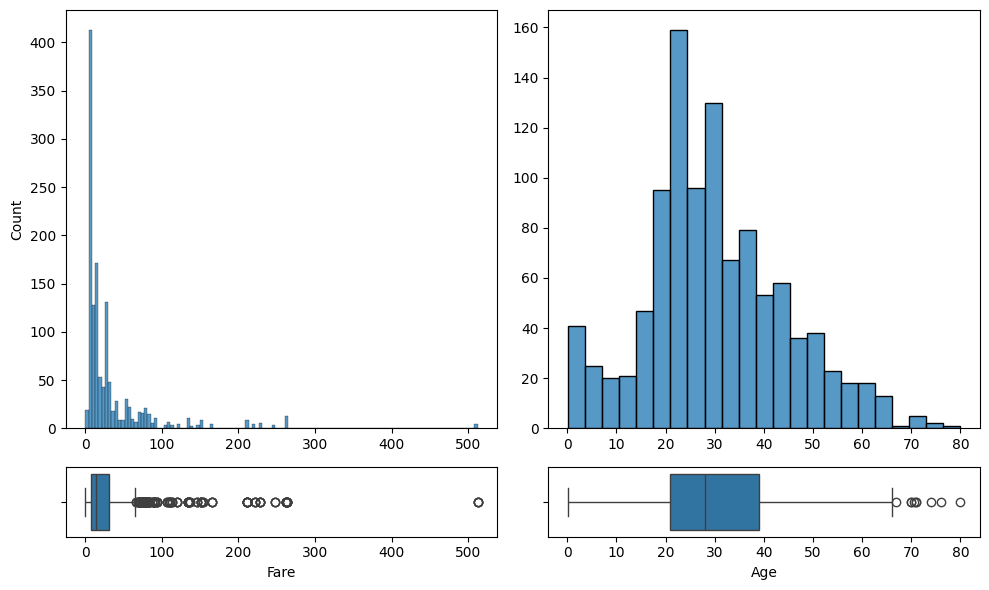

In [19]:
fig, axis = plt.subplots(2, 2, figsize = (10, 6), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df, x = "Fare").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "Fare")

sns.histplot(ax = axis[0, 1], data = df, x = "Age").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "Age")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

La combinación de los dos gráficos anteriores nos permite conocer la distribución y sus características estadísticas.

Podemos ver que ambas variables tienen valores atípicos que están lejos de la distribución estándar y que sus distribuciones son ligeramente asimétricas pero cercanas a una distribución normal.

La primera totalmente sesgada hacia la izquierda, donde la media es inferior a la moda y la otra con menor tendencia.

## 7. Análisis multivariante <a name="multivariante"></a>

Tras analizar las características una a una, es momento de analizarlas en relación con la predictora y con ellas mismas, para sacar conclusiones más claras acerca de sus relaciones y poder tomar decisiones sobre su procesamiento.

Así, si quisiéramos eliminar una variable debido a una alta cantidad de valores nulos o ciertos outliers, es necesario antes aplicar este proceso para asegurar que la eliminación no son críticos para la supervivencia de un pasajero.

Por ejemplo, la variable `Cabin` tiene muchos valores nulos, y tendríamos que asegurar que no hay relación entre ella y la supervivencia antes de eliminarla, ya que quizá pudiera ser muy significativa e importante para el modelo y su presencia podría decantar la predicción.

#### Análisis numérico-numérico

Cuando las dos variables que se comparan tienen datos numéricos.

Para comparar dos columnas numéricas se utilizan diagramas de dispersión y análisis de correlaciones.

##### Survived - (Fare, Age)

Utilizaremos la variable `Survived` para comenzar con el análisis bivariante porque al tratarse de una variable categórica, pero codificada en números, puede considerarse como numérica también.

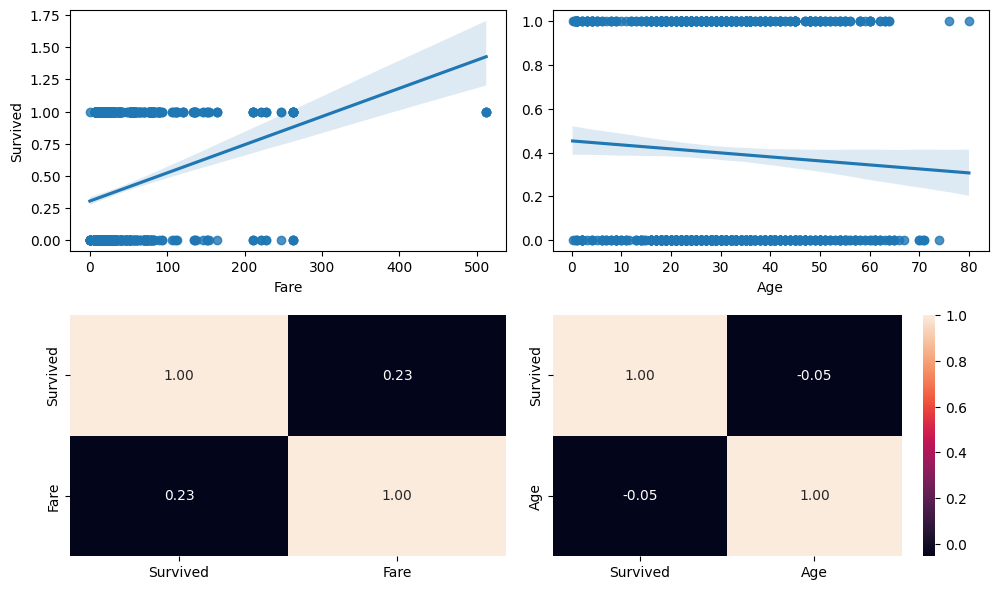

In [20]:
fig, axis = plt.subplots(2, 2, figsize = (10, 6))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df, x = "Fare", y = "Survived")
sns.heatmap(df[["Survived", "Fare"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "Age", y = "Survived").set(ylabel=None)
sns.heatmap(df[["Survived", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

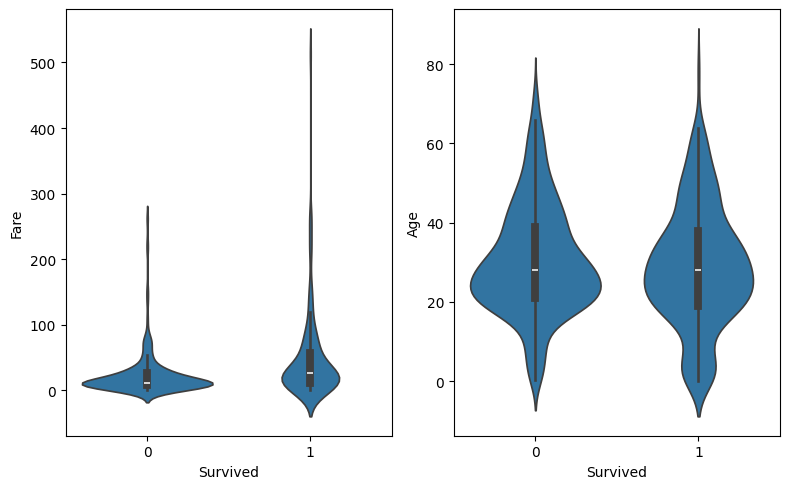

In [21]:
plt.show()

fig, axis = plt.subplots(1, 2, figsize = (8, 5))

sns.violinplot(ax = axis[0], x='Survived', y='Fare', data=df)
sns.violinplot(ax = axis[1], x='Survived', y='Age', data=df)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

La forma del "violin" muestra la distribución de la variable. La anchura del violin en cualquier punto indica la densidad de los datos en esa región. Si el violin es más ancho en una parte específica, significa que hay más datos en esa región. Por el contrario, si el violin es más estrecho, significa que hay menos datos.

Las partes superior e inferior del violin representan los valores máximo y mínimo de los datos, respectivamente

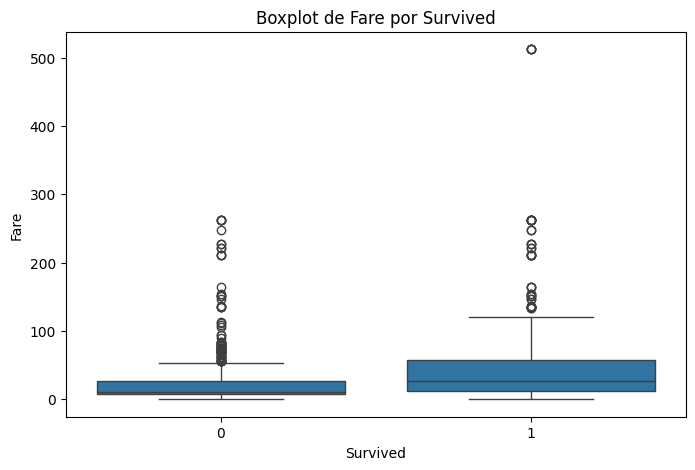

In [22]:
plt.figure(figsize=(8, 5))

sns.boxplot(x='Survived', y='Fare', data=df)

plt.title('Boxplot de Fare por Survived')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

No existe una relación clara entre el precio del billete (`Fare`) y la supervivencia del pasajero.

Algunos pasajeros con un importe bajo de billete tuvieron menos probabilidad de supervivencia frente a los que adquirieron un billete con un precio mayor.

Existe una relación lineal negativa, más débil que la anterior, entre la edad (`Age`) y la variable objetivo. Esto tiene sentido considerando que los niños eran uno de los grupos que tenían preferencia en usar los botes para sobrevivir.

En resumen, a pesar de existir cierta relación con estas características frente a la predictora, la significancia no es muy elevada, no siendo factores decisivos sobre si un pasajero sobrevivía o no.

##### Fare - Age

A continuación también podemos relacionar ambas variables para determinar su grado de afinidad o correlación:

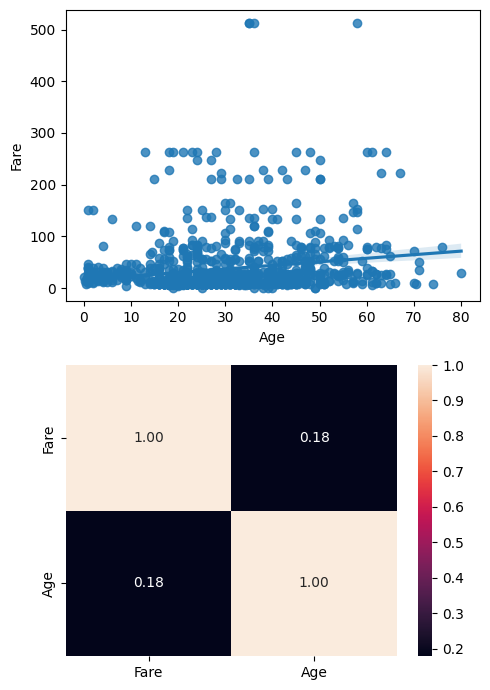

In [23]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = df, x = "Age", y = "Fare")
sns.heatmap(df[["Fare", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Se puede determinar que no existe una relación muy fuerte entre ambas variables y que la edad no impacta sobre que el precio del billete sea mayor o no.

#### Análisis categórico-categórico

Cuando las dos variables que se comparan tienen datos categóricos.

Para comparar dos columnas categóricas se utilizan gráficos de barras.

##### Survived - (Sex, Pclass, Embarked, SibSp, Parch)

Primero analizamos la clase frente a las características categóricas, una a una.

El count plot muestra el conteo de supervivientes y no supervivientes en cada categoría de la variable categórica.

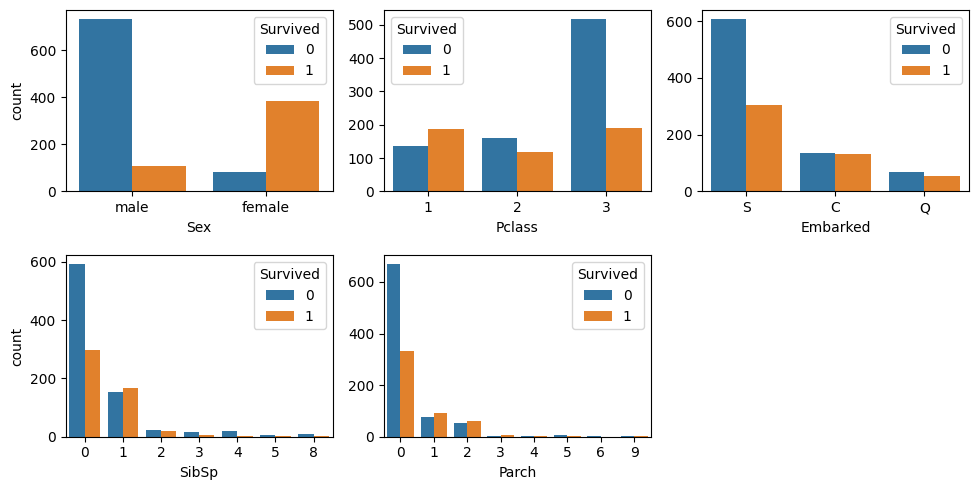

In [24]:
fig, axis = plt.subplots(2, 3, figsize = (10, 5))

sns.countplot(ax = axis[0, 0], data = df, x = "Sex", hue = "Survived")
sns.countplot(ax = axis[0, 1], data = df, x = "Pclass", hue = "Survived").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = df, x = "Embarked", hue = "Survived").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = df, x = "SibSp", hue = "Survived")
sns.countplot(ax = axis[1, 1], data = df, x = "Parch", hue = "Survived").set(ylabel = None)

plt.tight_layout()
fig.delaxes(axis[1, 2])

plt.show()

Este gráfico muestra la frecuencia de las categorías en la variable categórica y cómo se distribuyen entre los pasajeros que sobrevivieron y los que no sobrevivieron.

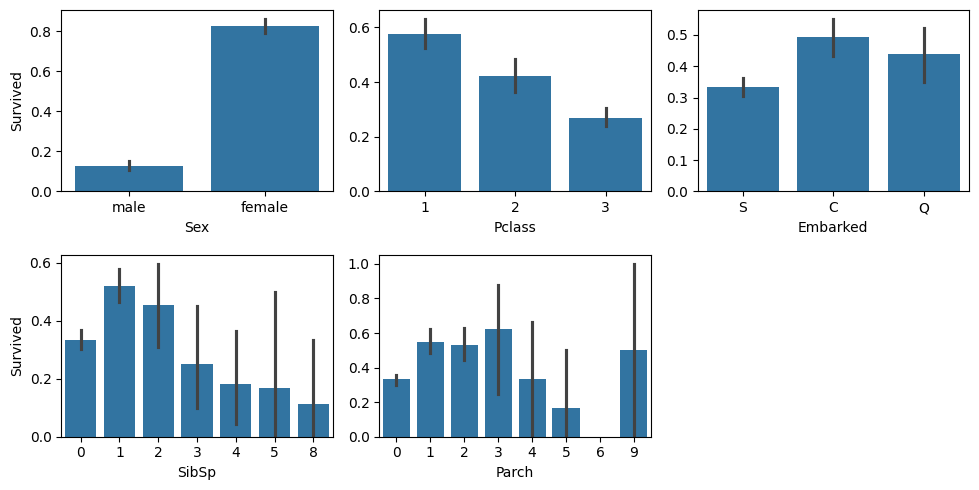

In [25]:
fig, axis = plt.subplots(2, 3, figsize = (10, 5))

sns.barplot(ax = axis[0, 0], data = df, x = "Sex", y = "Survived")
sns.barplot(ax = axis[0, 1], data = df, x = "Pclass", y = "Survived").set(ylabel = None)
sns.barplot(ax = axis[0, 2], data = df, x = "Embarked", y = "Survived").set(ylabel = None)
sns.barplot(ax = axis[1, 0], data = df, x = "SibSp", y = "Survived")
sns.barplot(ax = axis[1, 1], data = df, x = "Parch", y = "Survived").set(ylabel = None)

plt.tight_layout()
fig.delaxes(axis[1, 2])

plt.show()

Este gráfico muestra la proporción de supervivientes y no supervivientes apilados en cada categoría. Es útil para ver la composición relativa de supervivencia dentro de cada categoría.

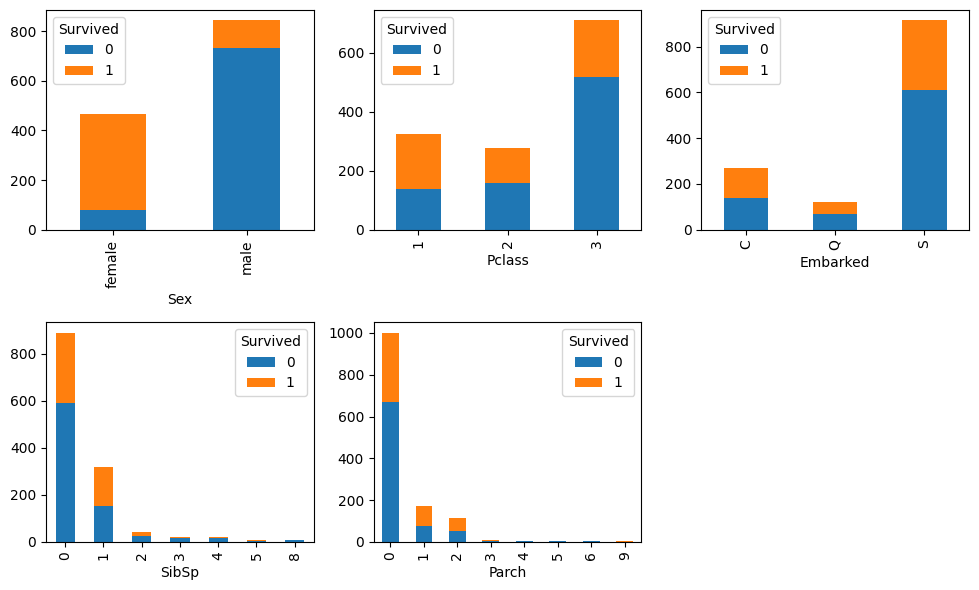

In [26]:
fig, axis = plt.subplots(2, 3, figsize = (10, 6))

crosstab_sex = pd.crosstab(df['Sex'], df['Survived'])
crosstab_sex.div(crosstab_sex.sum(1).astype(float), axis=0)
crosstab_sex.plot(kind='bar', stacked=True, ax = axis[0, 0])

crosstab_pclas = pd.crosstab(df['Pclass'], df['Survived'])
crosstab_pclas.div(crosstab_pclas.sum(1).astype(float), axis=0)
crosstab_pclas.plot(kind='bar', stacked=True, ax = axis[0, 1])

crosstab_emb = pd.crosstab(df['Embarked'], df['Survived'])
crosstab_emb.div(crosstab_emb.sum(1).astype(float), axis=0)
crosstab_emb.plot(kind='bar', stacked=True, ax = axis[0, 2])

crosstab_SibSp = pd.crosstab(df['SibSp'], df['Survived'])
crosstab_SibSp.div(crosstab_SibSp.sum(1).astype(float), axis=0)
crosstab_SibSp.plot(kind='bar', stacked=True, ax = axis[1, 0])

crosstab_Parch = pd.crosstab(df['Parch'], df['Survived'])
crosstab_Parch.div(crosstab_Parch.sum(1).astype(float), axis=0)
crosstab_Parch.plot(kind='bar', stacked=True, ax = axis[1, 1])

plt.tight_layout()
fig.delaxes(axis[1, 2])

plt.show()

In [27]:
crosstab_sex

Survived,0,1
Sex,,
female,81,385
male,734,109


Del análisis anterior podemos obtener las siguientes conclusiones:

- Con mayor proporción sobrevivieron las mujeres frente a los hombres. Esto es así porque en los planes de evacuación tenían prioridad las mujeres frente a los hombres.

- Las personas que viajaron solas tuvieron más problemas para sobrevivir frente a las que viajaron acompañadas.

- Aquellos que viajaron en una mejor clase en el Titanic tuvieron una mayor probabilidad de supervivencia.

##### Combinaciones de la clase con varias predictoras

El análisis multivariante también permite combinar la clase con varias predictoras al mismo tiempo para enriquecer el análisis.

Este tipo de operaciones deben ser subjetivas y deben combinar características relacionadas entre sí.

Por ejemplo, no tendría sentido hacer un análisis entre la clase, el sexo del pasajero y la estación en la que accedió al Titanic.

Sin embargo, la clase y el sexo del pasajero frente a su supervivencia podría ser un análisis digno de estudio, entre otras casuísticas que se presentan a continuación.

En un barplot para variables binarias en Y como Survived: muestra la proporción de casos donde la variable es 1 (por ejemplo, la proporción de supervivientes). Esto se calcula como la media de los valores de la variable binaria para cada grupo.

Para variables numéricas el eje Y muestra la media de la variable numérica para cada grupo en el eje X.

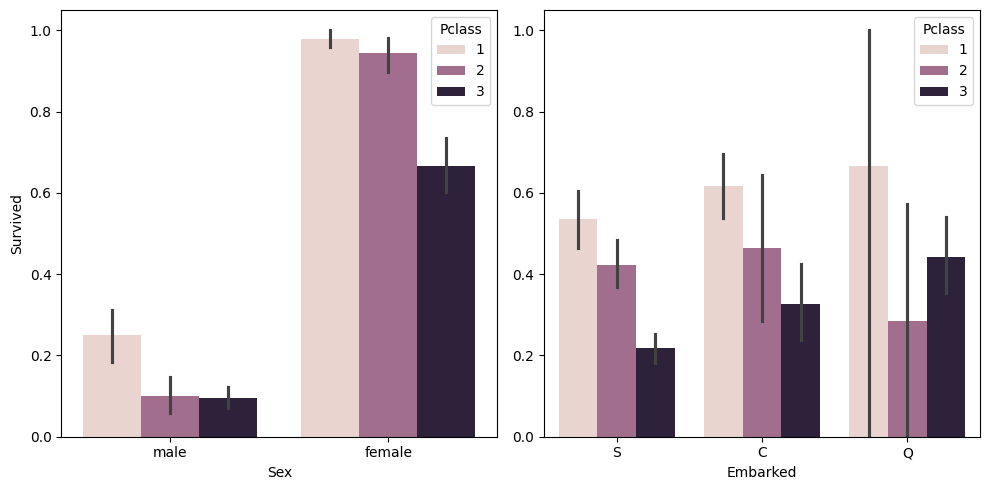

In [28]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

# Calcular la proporción de supervivencia por clase y sexo
sns.barplot(ax = axis[0], data = df, x = "Sex", y = "Survived", hue = "Pclass")
# Calcular la proporción de supervivencia por puerto y sexo
sns.barplot(ax = axis[1], data = df, x = "Embarked", y = "Survived", hue = "Pclass").set(ylabel = None)

plt.tight_layout()

plt.show()

De esos análisis se observa que, independientemente del puerto de embarque, las mujeres tuvieron más posibilidades de supervivencia en todas las clases.

Además, de media, las personas que viajaron en clases más altas sobrevivieron más que aquellos que no lo hicieron.

##### Análisis de correlaciones

El objetivo del análisis de correlaciónes con datos categóricos-categóricos es descubrir patrones y dependencias entre variables, lo que ayuda a entender cómo interactúan dentro de un conjunto de datos.

Este análisis tiene como objetivo determinar si y cómo las categorías de una variable están relacionadas con las categorías de otra.

In [29]:
df["Sex_n"] = pd.factorize(df["Sex"])[0]
df["Embarked_n"] = pd.factorize(df["Embarked"])[0]

In [30]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_n,Embarked_n
0,0,3,male,22.0,1,0,7.2500,S,0,0
1,1,1,female,38.0,1,0,71.2833,C,1,1
2,1,3,female,26.0,0,0,7.9250,S,1,0
3,1,1,female,35.0,1,0,53.1000,S,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,0


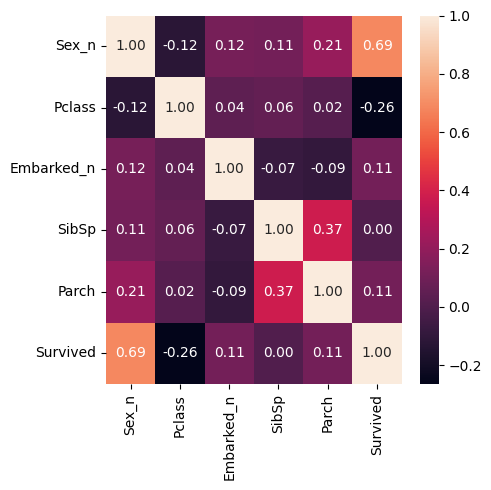

In [31]:
fig, axis = plt.subplots(figsize = (5, 5))

sns.heatmap(df[["Sex_n", "Pclass", "Embarked_n", "SibSp", "Parch", "Survived"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

El análisis de correlaciones refleja una fuerte relación directa entre el sexo (`Sex`) del pasajero y su supervivencia, como hemos visto en apartados anteriores.

Además, se aprecia una relación entre el número de acompañantes de los pasajeros (variables `SibSp` y `Parch`).

El resto de las correlaciones son débiles y no son tan significativas como para contemplarlas en el análisis.

#### Análisis numérico-categórico (completo)

Para ello, simplemente hemos de calcular las correlaciones entre las variables, ya que es el mayor indicativo sobre las relaciones.

Otro elemento que nos puede ser de mucha ayuda es obtener las relaciones dos a dos entre todos los datos del dataset.

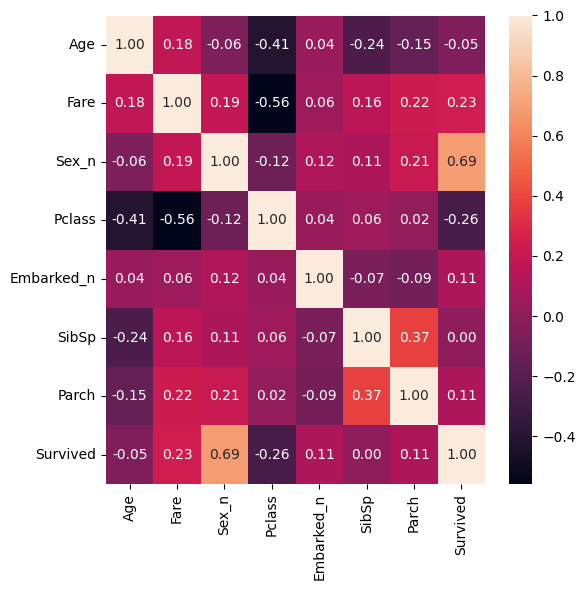

In [32]:
fig, axis = plt.subplots(figsize = (6, 6))

sns.heatmap(df[["Age", "Fare", "Sex_n", "Pclass", "Embarked_n", "SibSp", "Parch", "Survived"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Existe una relación entre la tipología de clase (`Pclass`) y la edad del pasajero (`Age`) negativa (los que viajaban en primera clase eran personas con alta edad) y entre la clase y la tarifa pagada (`Fare`), algo que tiene mucho sentido.

El resto de correlaciones se mantienen con respecto a lo visto anteriormente.

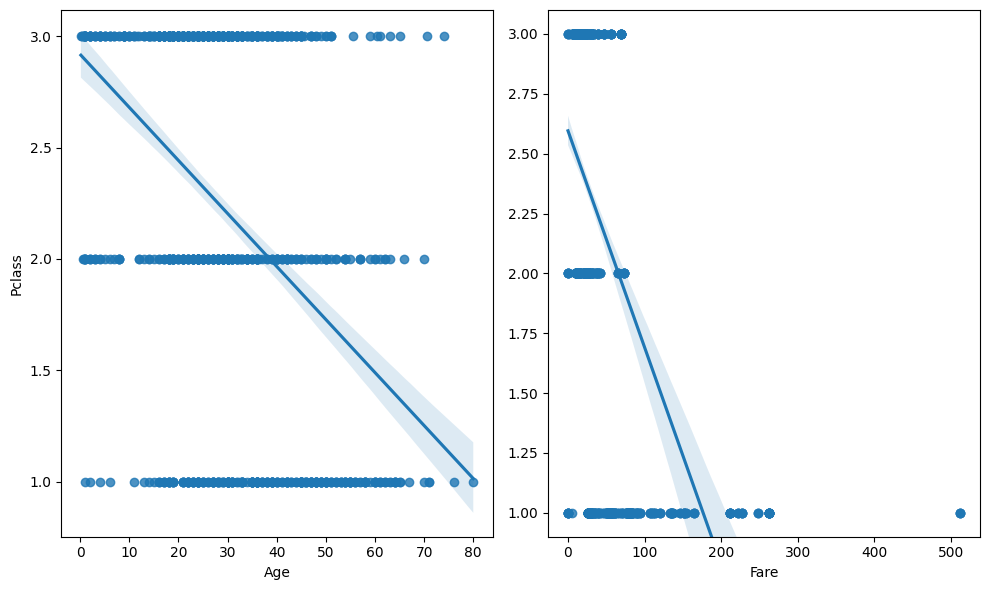

In [33]:
fig, axis = plt.subplots(figsize = (10, 6), ncols = 2)

sns.regplot(ax = axis[0], data = df, x = "Age", y = "Pclass")
sns.regplot(ax = axis[1], data = df, x = "Fare", y = "Pclass").set(ylabel = None, ylim = (0.9, 3.1))

plt.tight_layout()

plt.show()

In [ ]:
fig, axis = plt.subplots(figsize = (10, 6), ncols = 2)

sns.scatterplot(ax = axis[0], data=df, x='Pclass', y='Age', hue='Pclass', palette='viridis', alpha=0.7)
sns.scatterplot(ax = axis[1], data=df, x='Pclass', y='Fare', hue='Pclass', palette='viridis', alpha=0.7)

plt.show()

En el primer gráfico vemos que cuando la edad avanza, la presencia de billetes de primera clase se hace más notoria, y conforme la edad decrece, los billetes de tercera clase se hacen más presentes, reforzando la relación negativa entre las variables observadas.

El segundo gráfico también refuerza lo observado, ya que los billetes de mejor clase deben ser más caros.

In [ ]:
# relaciones todos con todos
sns.pairplot(data = df)

## 8. Links de interés <a name="links"></a>

- [Understand Your Problem and Get Better Results Using Exploratory Data Analysis](https://machinelearningmastery.com/understand-problem-get-better-results-using-exploratory-data-analysis/)
- [Rapid-Fire EDA Process Using Python for ML Implementation](https://www.analyticsvidhya.com/blog/2021/04/rapid-fire-eda-process-using-python-for-ml-implementation/)
- [Python for Data Analysis](https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1491957662)